In [1]:
# useful to autoreload the module without restarting the kernel
%load_ext autoreload
%autoreload 2

In [2]:
from mppi import Parsers as P

# Tutorial of the PwParser class

This tutorial describes the usage of the class PwParser of mppi used to extract information for the XML output file data-file-schema produced
by pw.

## Parse of a scf output file

The class is initialized by specifying the name of the xml file including its relative path 

In [3]:
results = P.PwParser('IO_files/si_scf.save/data-file-schema.xml')

Parse file : IO_files/si_scf.save/data-file-schema.xml


When the object is initialized several attributes are set, for instance

In [4]:
results.units

'Hartree atomic units'

In [5]:
results.atomic_positions

[['Si', [-1.2875, 1.2875, 1.2875]], ['Si', [1.2875, -1.2875, -1.2875]]]

In [6]:
results.atomic_species

{'Si': ['2.808600000000000e1', 'Si.pbe-mt_fhi.UPF']}

In [7]:
results.nkpoints

6

In [8]:
results.nbands

4

In [9]:
results.kpoints

[[0.0, 0.0, 0.0],
 [-0.3333333333333333, 0.3333333333333333, -0.3333333333333333],
 [0.0, 0.6666666666666666, 0.0],
 [0.6666666666666669, -5.551115123125783e-17, 0.6666666666666669],
 [-0.3333333333333333, 0.3333333333333333, 0.3333333333333333],
 [-0.6666666666666669, 0.6666666666666669, 0.0]]

Arrays with the energy (in Hartree) for all the kpoints and for all the bands

In [13]:
results.evals

array([[-0.20362013,  0.23008746,  0.23009597,  0.23009597],
       [-0.15364325,  0.03525018,  0.19221198,  0.19221959],
       [-0.13371509,  0.0489887 ,  0.13980064,  0.1398055 ],
       [-0.08408231, -0.01551476,  0.06707819,  0.15095046],
       [-0.15364376,  0.03524954,  0.19221929,  0.19221929],
       [-0.08408382, -0.01551278,  0.0670755 ,  0.15095544]])

In [20]:
results.fermi

0.2300959736436337

In [13]:
results.energy

-7.828160394451467

In [14]:
results.weights

[[0.07407407407407],
 [0.4444444444444],
 [0.4444444444444],
 [0.4444444444444],
 [0.1481481481481],
 [0.4444444444444]]

There are also some get methods to extract relevant quantities and perform simple operations, like
the units conversion, for instance

In [15]:
results.get_fermi()

6.261230355862744

provides the fermi energy in eV.

The class contain a methods that extract the ks dos

In [14]:
Dos = results.Dos()
energy = Dos[:,0]
dos = Dos[:,1]

In [15]:
import matplotlib.pyplot as plt

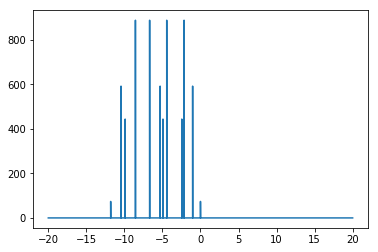

In [16]:
plt.plot(energy,dos)

...broad still to be tested....

The Dos method will be removed from the parser and a more complete Dos class will be introduced.

## Parse of a nscf output file

The parsing of the nscf (or other type) of pw calculation are performed in the same way as the scf ones.
In these cases some attriubte are not computed by pw, for instance results.energy is equal to zero

In [37]:
results = P.PwParser('IO_files/gaas_bands.save/data-file-schema.xml') # kpoints provided along a path

Parse file : IO_files/gaas_bands.save/data-file-schema.xml


In this case all the weights are equal

In [38]:
results.weights[0:10]

[[0.02197802197802],
 [0.02197802197802],
 [0.02197802197802],
 [0.02197802197802],
 [0.02197802197802],
 [0.02197802197802],
 [0.02197802197802],
 [0.02197802197802],
 [0.02197802197802],
 [0.02197802197802]]

The presence of empty bands can be checked by looking at the occupations attribute, for instance

In [43]:
results.occupations[0]

array([1., 1., 1., 1., 0., 0., 0., 0.])

In [44]:
results.get_num_occupied_bands()

4

In [45]:
results.fermi #*27.211386

0.1729112420976524

In [46]:
results.get_gap()

Direct gap system
Gap : 0.2255511700729025 eV


{'gap': 0.2255511700729025,
 'direct_gap': 0.2255511700729025,
 'position_cbm': 30,
 'positon_vbm': 30}

Test for a nscf computation of Silicon

In [50]:
results = P.PwParser('QeCalculator_test/si_nscf_test1.save/data-file-schema.xml')

Parse file : QeCalculator_test/si_nscf_test1.save/data-file-schema.xml


In [51]:
results.get_gap()

Indirect gap system
Gap : 0.723410090028532 eV
Direct gap : 2.551225478562494 eV


{'gap': 0.723410090028532,
 'direct_gap': 2.551225478562494,
 'position_cbm': 6,
 'positon_vbm': 0}

In [52]:
results.kpoints[6]

[0.0, -1.0, 0.0]

In [64]:
bla = results.get_evals(set_gap=1.2)
print(len(bla))
print(len(bla[0]))
bla

Apply a scissor of 0.476589909971468 eV
13
8


array([[-1.19029066e+01, -1.15202563e-05, -1.15202537e-05,
         0.00000000e+00,  3.02781539e+00,  3.02782024e+00,
         3.02782024e+00,  3.62866210e+00],
       [-1.11087187e+01, -3.91438912e+00, -7.55254677e-01,
        -7.55246069e-01,  2.43899694e+00,  3.96697985e+00,
         3.96698629e+00,  7.23456560e+00],
       [-9.59277710e+00, -6.92985959e+00, -1.19275198e+00,
        -1.19274346e+00,  1.94751203e+00,  3.81550785e+00,
         3.81551567e+00,  8.18329730e+00],
       [-1.08284772e+01, -3.52489435e+00, -1.87500369e+00,
        -1.87499981e+00,  1.60868162e+00,  3.59597058e+00,
         6.18942927e+00,  6.18942973e+00],
       [-9.20683725e+00, -6.36137136e+00, -3.50626494e+00,
        -2.18894813e+00,  1.99771219e+00,  4.90760667e+00,
         6.13553231e+00,  6.36609339e+00],
       [-9.87491703e+00, -5.46742702e+00, -3.71904713e+00,
        -1.31943623e+00,  2.90339260e+00,  5.23463601e+00,
         5.57391082e+00,  6.52312029e+00],
       [-7.79007523e+00, -7.790067

In [65]:
plu =bla.T
len(plu)

8